## Tarea 8.3
Considere una curva gaussiana con media $0$ y varianza $1$. Aproxime esta curva con una spline cúbica usando 5 puntos entre $x = 0$ y $x = 2$. Use esta spline para calcular la integral de la función. Compare el resultado con su valor exacto (ver la función de error de tareas anteriores).


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import special 

In [49]:
def Encontrando_indices(x, puntos):
    '''
    Esta funcion encuentra los índices de los puntos.
    '''
    for i in range(len(puntos)): 
        # Inicamos un ciclo for para la longitud de los puntos
        if x < puntos[i,0] and i != 0: # Aquí se definen con la condicional
                                       # los indices de los puntos
            
            return i-1
#Esto nos permitirá interpolar los puntos para la spline cúbica.
def Interpolación_Lineal(x, puntos):
    
    '''
    Esta función representa la interpolacion lineal
    de la splitline
    '''
    if x >= puntos[len(puntos)-1,0]:
        return puntos[len(puntos)-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = Encontrando_indices(x, puntos)
    Lo = puntos[i][1]*(x - puntos[i+1][0])/(puntos[i][0] - puntos[i+1][0])
    L1 = puntos[i+1][1]*(x - puntos[i][0])/(puntos[i+1][0] - puntos[i][0])
    return Lo + L1
    # Al final interpolamos la spliline de forma lineal, usando la funcion
    # Encontrando indices para cada interpolacion de puntos.

Ahora empezaremos a calcular los coeficientes del spline.

In [50]:
def spline_coeficientes(puntos):
    '''
    Esta función calcula los coeficientes de la spline cúbica,
    para los polinomios de orden 3, que tiene interpolar

    Input:

    puntos: son los puntos que del polinomio de orden 3 que queremos
    interpolar
    '''
    n = len(puntos) - 1
    
    h = np.zeros(n)
    for i in range(n):
        h[i] = puntos[i + 1][0] - puntos[i][0]
    
    a_0 = puntos[:,1]
    alpha = np.zeros(n - 1)
    for i in range(1, n):
        alpha[i-1] = (3/h[i])*(a_0[i+1] - a_0[i]) - (3/h[i-1])*(a_0[i] - a_0[i-1])
        
        
    # Acá solamente se resuelve un sistema de ecuaciones.
    # Se utilizan una serie de variables con nombres simples por
    # convenciencia:
    l = np.ones(n + 1)
    mu = np.zeros(n)
    z = np.zeros(n + 1)
    for i in range(1, n):
        l[i] = 2*(puntos[i+1][0] - puntos[i-1][0]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i-1] - h[i-1]*z[i-1])/l[i]
    a_1 = np.zeros(n)
    a_2 = np.zeros(n+1)
    a_3 = np.zeros(n)
    for j in range(n-1,-1,-1):
        a_2[j] = z[j] - mu[j]*a_2[j+1]
        a_1[j] = (a_0[j+1] - a_0[j])/h[j] - h[j]*(a_2[j+1] + 2*a_2[j])/3
        a_3[j] = (a_2[j+1] - a_2[j])/(3*h[j])
        
    return a_0, a_1, a_2, a_3

def Evaluacion_Spline(x, coeficientes, puntos):
    
    '''
    Esta función aproxima el polinomio de la spline a otra
    función dependiente de x.
    
    Input:
    x = la variable de evaluación
    coeficientes = son los coeficientes de la 
                   spline cúbica.
                   
    puntos: Son los puntos del polinomio cúbico.             
    
    '''
    if x >= puntos[-1,0]:
        return puntos[-1,1]
    elif x <= puntos[0,0]:
        return puntos[0,1]
    
    i = Encontrando_indices(x, puntos)
    a_0, a_1, a_2, a_3 = coeficientes
    return (a_0[i] + a_1[i]*(x - puntos[i][0]) + \
              a_2[i]*(x - puntos[i][0])**2 + a_3[i]*(x - puntos[i][0])**3) 
  
# Regresa el polinomio cúbico, pero ahora con los coeficientes y representando
# el polinomio cúbico como una función.

# Lo que se hace generalmente es 

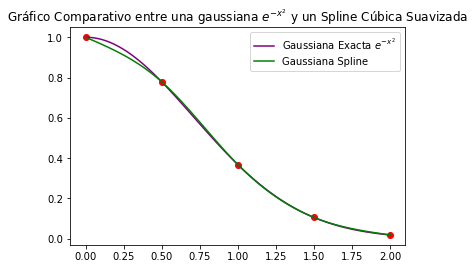

In [47]:
minimo = 0    # Acá se definen los límites de integración
maximo = 2 
order = 5     # Se escogen 5 puntos.

xp = np.linspace(minimo, maximo, order)
puntos = np.array([[xi, np.exp((-1)*xi**2)] for xi in xp])
coeficientes= spline_coeficientes(puntos)

x = np.linspace(minimo, maximo, 100)
función_exacta = np.exp((-1)*x**2) # Está es la función gaussiana.
spline = [Evaluacion_Spline(xi, coeficientes, puntos) for xi in x] 
# Aquí se hace la compresión de listas para los puntos de la Spline

plt.scatter(puntos[:,0], puntos[:,1], color='red')
plt.plot(x, exact,label="Gaussiana Exacta $e^{-x^2}$", color="purple") 
# Se gráfica la exponencial exacta, mientras que en la linea de
# abajo gráfica la spline.
plt.plot(x, spline, label="Gaussiana Spline", color="green")
plt.title("Gráfico Comparativo entre una gaussiana $e^{-x^2}$ y un Spline Cúbica Suavizada")
plt.legend()
plt.show()

La spliline cúbica tiene un polinomio de orden 3, de la forma:

$$
P(x) = a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3 
$$

Que es el polinomio que está en la función Evaluación_Spline.

La integral de esta spline es:
$$
\int_{0}^{2} dx P(x) = \int_{0}^{0.5} dx P(x) + \int_{0.5}^{1} dx P(x) + \int_{1}^{1.5} dx P(x) + \int_{1.5}^{2} dx P(x)
$$

lo que quedaría como:

$$
\int_{0}^{2} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3) = \int_{0}^{0.5} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3) + \int_{0.5}^{1} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3) + \int_{1}^{1.5} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3) + \int_{1.5}^{2} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3)
$$

y esto sería igual a:

$$
\int_{0}^{2} dx (a_{0} + a_{1}(x - x_{0}) + a_{2}(x - x_{0})^2 + a_{3}(x - x_{0})^3) = \left[a_{0}x + a_{1}(\frac{x^2}{2} - x_0 x) + a_{2}\frac{(x - x_{0})^3}{3} + a_3\frac{(x - x_0)^4}{4}\right]^{0.5}_{0} + \left[a_{0}x + a_{1}(\frac{x^2}{2} - x_0 x) + a_{2}\frac{(x - x_{0})^3}{3} + a_3\frac{(x - x_0)^4}{4}\right]^{1}_{0.5} + \left[a_{0}x + a_{1}(\frac{x^2}{2} - x_0 x) + a_{2}\frac{(x - x_{0})^3}{3} + a_3\frac{(x - x_0)^4}{4}\right]^{1.5}_{1} + \left[a_{0}x + a_{1}(\frac{x^2}{2} - x_0 x) + a_{2}\frac{(x - x_{0})^3}{3} + a_3\frac{(x - x_0)^4}{4}\right]^{2}_{1.5}
$$